# Surya Sama Homework Set 4

In [66]:
%pylab inline 
import pandas as pd
import  fmt
import  inst

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Exercise (50+30 points)
[Scipy](https://docs.scipy.org/doc/scipy/reference/index.html) is the most used scientific package in Python. Let's use it to experiment [interpolation and extrapolation](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html).<br>
Let's consider the function:
$$ f(x) = \frac{x}{1+x^2} e^{\lambda x} $$

for $\lambda = 0.1$.<br>

1. Build 20 points to interpolate of that function for $x \in [0, 10]$ and add the value at $x=20$.
2. Use CubicSpline, PchipInterpolator, CubicHermiteSplin (choose the tangent line from the points built in 1. for the dxdy argument) from scipy on the points from previous point.
3. Perform interpolation and extrapolation on 40 points for $x \in [0,50]$.
4. Experiment on negative values of x.
5. What are your remarks?
6. Standard Cubic Spline should go negative for larger value of x.
7. [extra credit] Try the same with 2 other interpolator from Scipy of your choice.
8. [extra credit] Experiment the behavior of the inter/extra-polation for different values of $\lambda$ to build experience on the behavior of the different interpolation and comment.
9. [extra credit] Build examples in 2 dimensions on a smooth surface (e.g. $f(x,y) = x^2 - y^2$).

## Exercise 1 Solution

## Part 1

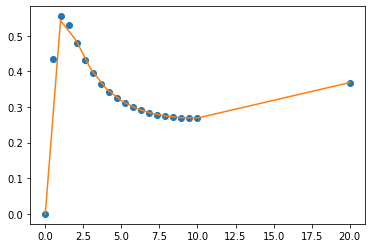

In [105]:
# Part 1
from scipy.interpolate import interp1d
x = np.linspace(0, 10 , 20) # generating evenly spaced 20 points of x in range from 0 to 10

def func(x,lbd):
    return (x*math.exp(lbd*x))/(1+x**2) # defining the function given to us
c = lambda x: func(x = x, lbd = 0.1) # getting f(x) for all the points generated
d = func(20,0.1) # Adding the Value of f(x) when x is 20

y = np.array([c(x) for x in x]) # creating an array of f(x) for 20 points
y = np.append(y,d) # adding value of f(x) at 20 to the previous array
x = np.append(x, 20) #adding 20 to x values
f = interp1d(x,y,) #using linear interpolation

x_new = np.linspace(0, 20, 21) # generating 21 points between 0 and 20 to interpolate linearly

plt.plot( x,y,'o',x_new, f(x_new) ) # plotting the original values which are blue dots and the interpolated curve which is in Orange color

## Part 2

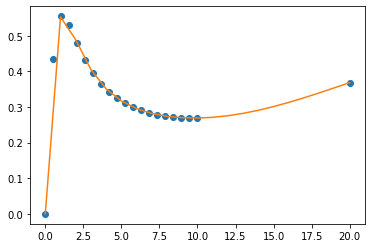

In [83]:
# Using Rational Tension to interpolate througha cubic spline
import lin
ts = lin.RationalTension(0.) #defining the cubic spline interpolation function
ts.build(x,y)
x_new = np.linspace(0, 20, 21)
plot(x,y,'o',x_new, ts.value(x_new))# ts.value(x_new ) is using the cubic spline interpolation to plot the x_new values generated and the dots represent the original values.

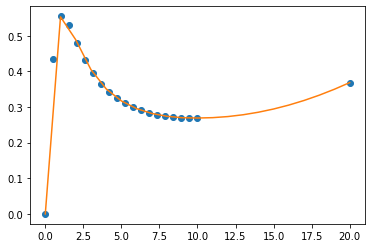

In [87]:
#Using PchipInterpolator and interpolating x_new
from scipy import interpolate
y2 = interpolate.PchipInterpolator(x,y,  extrapolate = True) # defining the method of interpolation
plot(x,y,'o',x_new,y2(x_new))

In [89]:
g = np.gradient(y,x) # Getting the gradients or first derivative values of the function given to us for Cubic hermite Spline interpolation

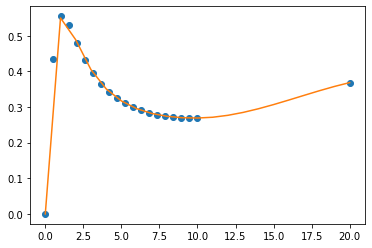

In [90]:
import scipy.interpolate
y3 = scipy.interpolate.CubicHermiteSpline(x,y,g, extrapolate = True) # using Cubic Hermit spline Interpolation
plot( x,y, 'o', x_new, y3(x_new)) #plotting the results of cubic hermit spline interpolation


## Part 3

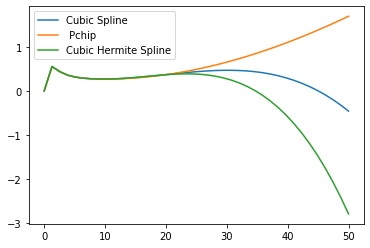

In [113]:
x1 = np.linspace(0,50,40) # generating 40 points between 0 and 50
plt.plot(x1, ts.value(x1)) #plotting the cubic spline extrapolation results
plt.plot(x1, y2(x1)) # plotting the Pchip extrapolated results
plt.plot(x1, y3(x1)) # Plotting the Cubic Hermite Spline results
plt.legend(['Cubic Spline', ' Pchip', 'Cubic Hermite Spline'])

## Part 6
We can see that for Standard Cubic Spline and  Cubic Hermite Spline the extrapolated results go negative for larger values of x.  The Standard Cubic spline is going negative for larger values compared to hermite spline. We can see the values going negative when x > 30. 

## Part 4

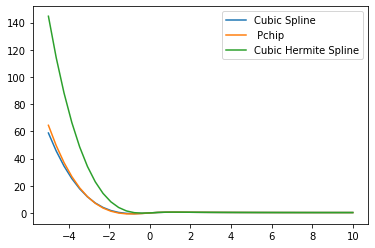

In [95]:
x2 = np.linspace(-5,10,40) # creating negative x values
plt.plot(x2, ts.value(x2)) #Using Cubic Spline to extrapolate
plt.plot(x2, y2(x2))# Using Pchip 
plt.plot(x2, y3(x2)) # Using Cubic Hermite spline
plt.legend(['Cubic Spline', ' Pchip', 'Cubic Hermite Spline'])

## Part 5
We see that the negative values have very high extrapolated results which are not correct. If we use negative values of x in the function we indeed get very small values results. But the interpolation is producing the results out of control.

## Problem (150 + 50 points)

Given the following benchmark swap quotes for USD, suppose all swap coupons are paid semi-annually:

In [96]:
mats = np.array([1, 2, 3, 5, 7, 10, 12, 15, 20, 25]) * 1.
par = np.array([.042, .043, .047, .054, .057, .06, .061, .059, .056, .0555])

df_swap = pd.DataFrame(np.array([par]).T*100, columns=["Par Rate (%)"],
                       index=map(lambda m: '%dY' % m, mats))
fmt.displayDF(df_swap.T, 2, 2)

,1Y,2Y,3Y,5Y,7Y,10Y,12Y,15Y,20Y,25Y
Par Rate (%),4.2,4.3,4.7,5.4,5.7,6.0,6.1,5.9,5.6,5.5


The swap pricers are provided by the python class ```Swap``` and the pricing function ```priceSwap```, both are defined below.

Note the following assumptions of the swap pricer provided:
* it prices a receiver swap, you need to flip the sign to price a payer swap
* it ignores important details, such as holiday calendar, day count conventions, etc... do not use this code in production or to trade! It's very basic for learning and conceptual illustration purposes.

In [97]:
import numpy as np

class Swap(object) :
    def __init__(self, maturity, coupon, freq) :
        '''
        Args:
            freq: frequency of payments, 2 for semi-annual
        '''
        self.maturity = maturity
        self.coupon = coupon
        self.freq = freq
        
    def __str__(self):
        return 'Swap: maturity %g, coupon %g, freq %g' % (self. maturity, self.coupon, self.freq)
 
def priceSwap(swap, discf) :
    '''
    compute par spreads and PV01 of a receiver IR swaps:
    Args:
        swap: a swap of type Swap
        discf: a function that computes discount curve, i.e., b(t)
    Returns:
        pv: the PV of the swap
    '''
    ts = np.arange(1./swap.freq, swap.maturity + 1e-6, 1./swap.freq) # why +1e-6?
    disc = discf(ts)
    pv01 = np.sum(disc)/swap.freq
    par = (1.-disc[-1])/pv01
    return (swap.coupon - par)*pv01

The following are some sample codes of how to use the swap pricers:

In [98]:
#from swap import Swap, priceSwap
import lin

# the pricing function if curve(t) is the cumulative yield, ie, -log(b(t))
def y2pv(swap, curve) :
    discf = lambda ts: np.exp(-curve(ts))
    return priceSwap(swap, discf)

# create the benchmark instruments
bm_swaps = {Swap(m, c, 2) : 0 for m, c in zip (mats, par)}

# price a single swap with a straight curve in y(t)
flat = lin.RationalTension(lbd = 5.)
flat.build(mats, mats*.04) # create a dummy curve of flat 0.04 rate

pvs = {swap.maturity : y2pv(swap, flat) for swap in bm_swaps.keys()}
print("PV by maturity")
print("\n".join(["%.2g Y : %.4g" % (m, v) for m, v in pvs.items()]))

PV by maturity
1 Y : 0.00155
2 Y : 0.004943
3 Y : 0.01846
5 Y : 0.06101
7 Y : 0.1003
10 Y : 0.1599
12 Y : 0.1943
15 Y : 0.2077
20 Y : 0.2126
25 Y : 0.2362


1. Explain what is the purpose of the +1e-6 in the first line of the ```priceSwap``` function
2. Use the market data above to bootstrap the IR curve by interpolating the cumulative yield $y(t) = -\log(b(t))$ with tension spline, where $b(t)$ is the discount factor (i.e., the price of risk free zero coupon bonds). After bootstrapping the curve, re-price the benchmark instruments using the bootstrapped curve, and compute the L-2 norm of the absolute pricing errors. Show how the pricing error of the bootstrapped curve depend on the tension parameter $\lambda$.
3. Using the iteration technique to reduce the L-2 norm of the error below 1bps, how many iteration is needed for the error to go below 1bps? 
4. From the curve built in the previous step, compute both the $y(t)$ and the instantaneous forward rate $f(t) = -\frac{1}{b(t)}\frac{d b(t)}{d t} = \frac{d y(t)}{dt}$, and show how their shapes change with the tension parameter $\lambda$. In addition, compare the changes in the instantaneous forward rates with 1bps change in the 5Y par swap rate. You can use the ```deriv()``` method in the Tension spline class. 
6. Repeat the previous step, but directly interpolating the forward rates $f(t)$, and comment on whether it is suitable in practice.
5. [extra credit] Build the curve by interpolating the zero rate with tension spline instead, i.e, $r(t) = \frac{y(t)}{t}$, compare how the forward rates shape and perturbations differ from those obtained in step 4, and comment on the pro and cons between interpolating $r(t)$ and $y(t)$.
7. [extra credit] write your own bootstrap function instead of calling those provided by the class library

Hint: 
* write your code in a modular and reusable way; you can re-use the code provided as part of the class lecture, but you get extra credit if you can write your own bootstrapping. The source code of the inst package is hidden from you, but you can figure out how to use them by reading their docstring with ```help()```, please use the python codes in the lecture slides as examples. <b> Note that this situation happens all the time in practice when re-using code developped by somebody else, either internally or externally </b>.
* question 3: to understand well what is happening, remember that the swap rate $s(t)$ although different, scales similarly with $r(t)$ and the PV of a swap is given by $pv01\times (s(t) - s_{quote}(t))$. Therefore, if the PV of the swap is positive, it means that the rate curve should be adjusted and $pv/pv01$ is a good proxy for such adjustment. At the extreme, if $pv=0$ as desired for all swap instruments, then no adjustment is needed.
* be careful with the choice of boundary for the root search, allow negative rates often helps stabilizing the bootstrapping, even though it does not (always) make economical sense.
* in step 5, you may have to mix the old and new results to stabilize the iteration, (e.g., use ```mixf=0.5``` in the ```inst.iterboot``` function, or your own)

In [15]:
import inst

## Part 1 
The purpose of +1e-6 is to include the last period of the maturity in the calculations. the np.arange function returns all the periods including the maturity period if +1e-6 is included otherwise the last period will be excluded.

## Part 2

In [139]:
lbds = [0,1,2,3,4,5] # Lambda values to iterate
pvs_boots = [] # storing the Present values for different lambdas 
tsits = [] # Storing the curves for differsnt lambdas
vs= []
for lbd in lbds:
    tsit_lbd, v_lbd = inst.iterboot(bms = bm_swaps, pfunc= y2pv , bds = [-1.5, 1.5], x0 = 0 , its = 10, lbd =lbd) # bootstrapping with pricing function as y2pv and benchmarks as thso in the question
    pvs_lbd = {swap.maturity : y2pv(swap, tsit_lbd) for swap in bm_swaps.keys()}
    pvs_lbd = np.array(list(pvs_lbd.values()))
    pvs_boots.append(pvs_lbd)
    tsits.append(tsit_lbd)
    vs.append(v_lbd)

pvs_boots = np.array(pvs_boots)    

In [140]:
pvs_original = np.array(list(pvs.values()))
pvs_original # PVs of using the flat curve

array([0.00155019, 0.00494253, 0.01846467, 0.06100526, 0.10032343,
       0.15991126, 0.19434454, 0.20768163, 0.21258472, 0.23620528])

In [141]:
pvs_boots[0] # PVs using boot strapped curve with lambda 0, everything close to 0.

array([-2.01784043e-17, -7.90304902e-17,  3.85847852e-17, -2.21847046e-13,
       -6.51222932e-15,  1.05201419e-16, -1.19095270e-16, -6.38654048e-15,
       -8.16697100e-17, -9.20124521e-17])

In [142]:
pvs_boots # each array is list of PVs calculated at a specific lambda, The list is in the ascending order of lambdas from 0 to 5

array([[-2.01784043e-17, -7.90304902e-17,  3.85847852e-17,
        -2.21847046e-13, -6.51222932e-15,  1.05201419e-16,
        -1.19095270e-16, -6.38654048e-15, -8.16697100e-17,
        -9.20124521e-17],
       [ 1.21074287e-16,  1.18542252e-16, -7.71633677e-17,
        -2.09169449e-13, -4.98450439e-15, -1.05187541e-16,
        -1.19088935e-16, -6.45593657e-15,  8.16622245e-17,
         9.19987239e-17],
       [ 6.05376305e-17, -6.05867092e-16, -2.89347982e-16,
        -2.01396879e-13, -4.46176672e-15,  1.57770139e-16,
         0.00000000e+00, -6.11294535e-15,  0.00000000e+00,
        -9.19920364e-17],
       [-1.95066082e-16, -2.23902969e-16, -4.24362192e-16,
        -1.96427549e-13, -3.65772824e-15,  3.15525823e-16,
        -1.19083821e-16, -6.04453590e-15,  0.00000000e+00,
        -9.19881256e-17],
       [-1.35873615e-15, -2.63411208e-17, -1.92886951e-16,
        -1.92495258e-13, -3.61743943e-15,  3.68101478e-16,
         4.76329860e-16, -6.11342759e-15, -1.63316929e-16,
        -4.

In [143]:
# Calculating L2 norms of absolute pricing errors for different lambdas
l2_norm_lbd0 = np.sqrt(sum(np.square(pvs_boots[0] - pvs_original)))# Calculating the L2 norm for all lamdas by taking absolute difference between the bootstrapped values and flat curve values
l2_norm_lbd1 = np.sqrt(sum(np.square(pvs_boots[1] - pvs_original)))
l2_norm_lbd2 = np.sqrt(sum(np.square(pvs_boots[2] - pvs_original)))
l2_norm_lbd3 = np.sqrt(sum(np.square(pvs_boots[3] - pvs_original)))
l2_norm_lbd4 = np.sqrt(sum(np.square(pvs_boots[4] - pvs_original)))
l2_norm_lbd5 = np.sqrt(sum(np.square(pvs_boots[5] - pvs_original)))

In [144]:
# Dataframe of L2_norms and their respective lambdas.We can see that almost all lamda values have similar norms.
norms = [l2_norm_lbd0, l2_norm_lbd1, l2_norm_lbd2, l2_norm_lbd3, l2_norm_lbd4, l2_norm_lbd5]
df = pd.DataFrame(zip(lbds, norms), columns = ['lbds', 'L2_norms'])
df

,lbds,L2_norms
0,0,0.47
1,1,0.47
2,2,0.47
3,3,0.47
4,4,0.47
5,5,0.47


In [145]:
norms # norms for different lambdas from 0 to 5

[0.470757342614471,
 0.470757342614469,
 0.4707573426144677,
 0.4707573426144669,
 0.4707573426144664,
 0.4707573426144657]

## Part 3

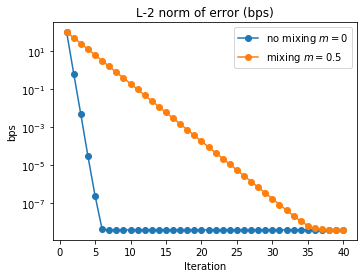

In [138]:
# Using the iteration technique to see how many iterations reduce the erros below 1 bps
figure(figsize=[12, 4])


tsit, e = inst.iterboot(bms = bm_swaps, pfunc= y2pv , bds = [-4, 4], x0 = 0 , its = 40, lbd =lbds[0]) # iterating the bootstrap 40 times without mixf
tsit1, e1 = inst.iterboot(bms = bm_swaps, pfunc= y2pv , bds = [-4, 4], x0 = 0 , its = 40,mixf = 0.5, lbd =lbds[0]) # iterating with mixf
plotboot(tsit, lbds[0], ax, tagsf)    

subplot(1, 2, 2)
semilogy(range(1, len(e)+1), np.transpose([np.linalg.norm(e, 2, 1)*1e4, np.linalg.norm(e1, 2, 1)*1e4]), 'o-') # plotting errors for both metods for 40 iterations
legend(['no mixing $m=0$', 'mixing $m=0.5$'], loc='best')

xlabel('Iteration')
ylabel('bps')
title('L-2 norm of error (bps)');


We can see that the errors have reduced below 1 bps after 4 iterations without mixing and after mising it took more than 20 iterations. We knoe mixing is a stable method but without mixing also we  are getting stable results. We can see the errors after 5 iterations stayed at the same level without mixing and both methods converge after certain number of iterations.

## Part 4

In [73]:
xs = np.arange(0.5,25,0.5) # Creating a range of maturities to interpolate the forward curve

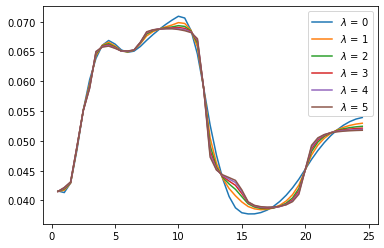

In [146]:
# Plotting the forward curve for different lambdas used in bootstrapping. We can see that lambdas 1, 2, 3 smoothed the curve. 
plt.plot(xs, (lin.RationalTension.deriv(tsits[0],xs))) # using deriv method in lin to differentiate the yield curve to get instantaneous forward rates.
plt.plot(xs, (lin.RationalTension.deriv(tsits[1],xs)))
plt.plot(xs, (lin.RationalTension.deriv(tsits[2],xs)))
plt.plot(xs, (lin.RationalTension.deriv(tsits[3],xs)))
plt.plot(xs, lin.RationalTension.deriv(tsits[4],xs))
plt.plot(xs, lin.RationalTension.deriv(tsits[5],xs))
legend(['$\\lambda$ = 0', '$\\lambda$ = 1','$\\lambda$ = 2', '$\\lambda$ = 3', '$\\lambda$ = 4', '$\\lambda$ = 5'])

## Part 5

In [119]:
# Instead of using flat curve, We are using forward curve we got with lambda 0 to bootstrap the yield curve and get the PVs of swaps.
forward_curve = lin.RationalTension.deriv(tsits[0],xs)
f_curve = lin.RationalTension(lbd= 5.)
f_curve.build(xs, forward_curve)
def y3pv(swap, f_curve) :
    discf = lambda ts: np.exp(-f_curve(ts))
    return priceSwap(swap, discf)

tsit_f, v_f = inst.iterboot(bms = bm_swaps, pfunc= y3pv , bds = [-1.5, 1.5], x0 = 0 , its = 10, lbd =0, mixf = 0.5) # adding mixf to stabilise the bootsratpping
pvs_forward = {swap.maturity : y3pv(swap, tsit_f ) for swap in bm_swaps.keys()}


In [120]:
pvs_forward# Pvs using forward curve to bootstrap. And we can see all values are close to 0.

{1.0: 3.2137378944575325e-05,
 2.0: 7.224197977971877e-05,
 3.0: 0.00012016031525590346,
 5.0: 0.0002375367103965318,
 7.0: 0.0003234335819059574,
 10.0: 0.0005001462849552396,
 12.0: 0.0004987592492266881,
 15.0: 0.0005842548895547289,
 20.0: 0.0007087629145004835,
 25.0: 0.0007344819009502863}